# SPARC-4 mini-pipeline tools
## Half-wave polarimetry

This notebook shows an example for obtaining a polarimetric analysis of a set of observations using the SPARC4 instrument in polarimetric mode with a half-wave rotating plate. It takes as input a series of science imaging products obtained with the SPARC4 pipeline.

* Eder Martioli, LNA 14 Feb 2023

In [1]:
import os,sys
path_parent = os.path.dirname(os.getcwd())
# path_parent = "/Volumes/Samsung_T5/sparc4-pipeline/"
sys.path.append(path_parent) 
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np
import glob

import sparc4_product_plots as s4plt
import sparc4_pipeline_lib as s4pipelib
import sparc4_utils as s4utils
import sparc4_params

### User inputs

In [2]:
# set night directory name
NIGHTDIR = '20221115'
# set SPARC4 channel
CHANNEL = 3  # 1, 2, 3 or 4
# set an object ID matching the ID in the image header keyword 'OBJECT'
OBJECTID = "NGC20241"
# whether or not to force reduction even if product already exists
FORCE = True

### Preparatory procedures
Below are some preparatory procedures for defining data directories and product file names.

In [4]:
# get SPARC4 pipeline parameters
p = sparc4_params.load_sparc4_parameters()
# set raw data root directory (where raw data will be searched)
p['ROOTDATADIR'] = "/Volumes/Samsung_T5/Data/SPARC4/comissioning_nov22/"
# set reduction directory name
p['ROOTREDUCEDIR'] = '/Volumes/Samsung_T5/Data/SPARC4/comissioning_nov22/reduced'
# if reduced dir doesn't exist create one
if not os.path.exists(p['ROOTREDUCEDIR']) :
    os.mkdir(p['ROOTREDUCEDIR'])
    
# identify files for reduction
p = s4utils.identify_files(p, NIGHTDIR, print_report=False)    

# set full paths for a given night and channel
data_dir = p['data_directories'][CHANNEL-1]
ch_reduce_dir = '{}/sparc4acs{}/'.format(p['ROOTREDUCEDIR'],CHANNEL)
reduce_dir = '{}/sparc4acs{}/{}/'.format(p['ROOTREDUCEDIR'],CHANNEL,NIGHTDIR)

# set input files
inputfiles = glob.glob('{}/*_s4c{}_ngc_l2_*_proc.fits'.format(reduce_dir,CHANNEL))
# set path for stack file
stack = '{}/20221115_s4c{}_{}_POL_L2_stack.fits'.format(reduce_dir,CHANNEL,OBJECTID)
#print(inputfiles, stack)

### Plot stack image
Below is a plot of the stack image obtained from all exposures in the polarimetric series

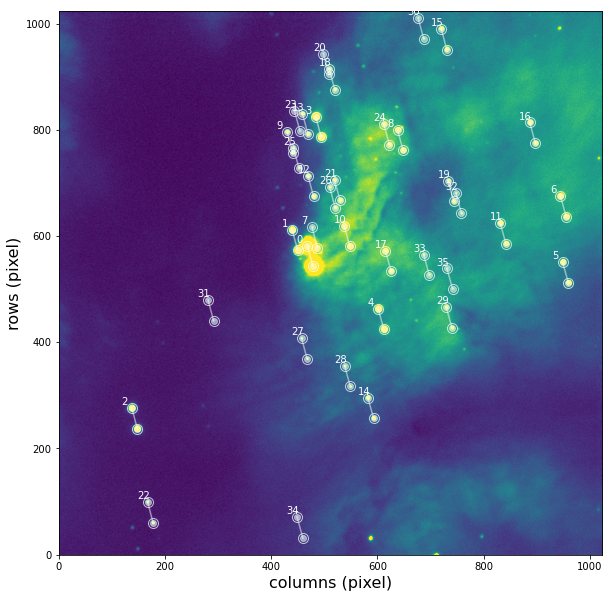

In [5]:
s4plt.plot_sci_polar_frame(stack, percentile=99.5)

### Calculate polarimetry
Run main routine to calculate polarimetry and stores into a polarimetry product

In [7]:
# Set path for a FITS polarimetry product 
if CHANNEL == 1 :
    polarl2product = "/Volumes/Samsung_T5/Data/SPARC4/comissioning_nov22/reduced/sparc4acs1/20221115/20221115_s4c1_ngc_l2_01_000145_l2_polar.fits"
elif CHANNEL == 2 :
    polarl2product = '/Volumes/Samsung_T5/Data/SPARC4/comissioning_nov22/reduced/sparc4acs2/20221115/20221116_s4c2_ngc_l2_01_000305_l2_polar.fits'
elif CHANNEL == 3 :
    polarl2product = '/Volumes/Samsung_T5/Data/SPARC4/comissioning_nov22/reduced/sparc4acs3/20221115/20221115_s4c3_ngc_l2_01_000230_l2_polar.fits'
elif CHANNEL == 4 :
    polarl2product = '/Volumes/Samsung_T5/Data/SPARC4/comissioning_nov22/reduced/sparc4acs4/20221115/20221115_s4c4_ngc_l2_01_000200_l2_polar.fits'

if not os.path.exists(polarl2product) :
    # calculate polarimetry and save data into a FITS polarimetry product
    print("calculating polarimetry .. ")    
    polarl2product = s4pipelib.compute_polarimetry(inputfiles, 
                                               output_filename="", 
                                               wave_plate='half_wave', 
                                               compute_k=True, 
                                               zero=0)

### Get polarimetry results
Get polarimetry results for all targets in the catalog and display those results.

Source index: i=0 
Source RA=100.5258822609234 Dec=-23.72475553154286 mag=<QFloat -8.929+-0.002 >
Best aperture radius: 10 pixels
Polarization in Q: <QFloat -0.0327+-0.0001 >
Polarization in U: <QFloat -0.0895+-0.0001 >
Total linear polarization p: <QFloat 0.0953+-0.0001 >
Angle of polarization theta: <QFloat 124.97+-0.03 >
Free constant k: <QFloat 1.0157936197823516+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.00093
Reduced chi-square (n=144, DOF=140): 2.49


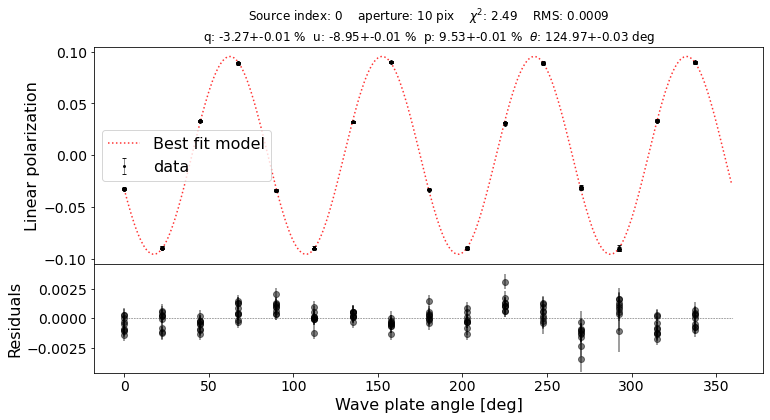

Source index: i=1 
Source RA=100.5258822609234 Dec=-23.72475553154286 mag=<QFloat -9.584+-0.001 >
Best aperture radius: 6 pixels
Polarization in Q: <QFloat -0.0024+-0.0006 >
Polarization in U: <QFloat 0.0038+-0.0007 >
Total linear polarization p: <QFloat 0.0045+-0.0007 >
Angle of polarization theta: <QFloat 61+-4 >
Free constant k: <QFloat 1.1331674327707952+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.00628
Reduced chi-square (n=144, DOF=140): 4.15


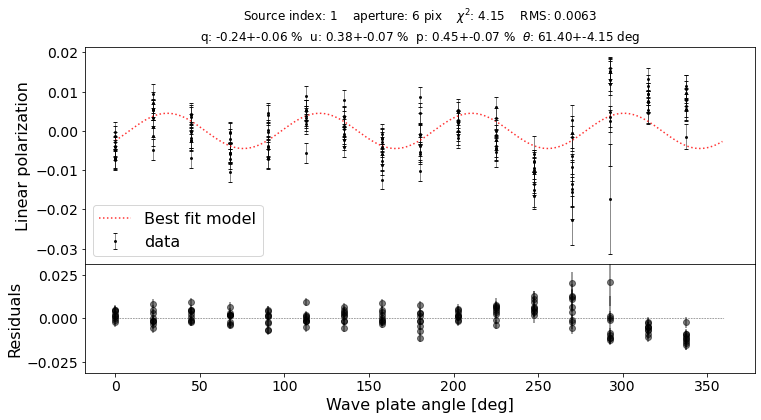

Source index: i=2 
Source RA=100.5258822609234 Dec=-23.72475553154286 mag=<QFloat -9.941+-0.001 >
Best aperture radius: 8 pixels
Polarization in Q: <QFloat 0.0002+-0.0004 >
Polarization in U: <QFloat 0.0001+-0.0004 >
Total linear polarization p: <QFloat 0.0002+-0.0004 >
Angle of polarization theta: <QFloat 10+-60 >
Free constant k: <QFloat 1.0046498557543335+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.00400
Reduced chi-square (n=144, DOF=140): 1.15


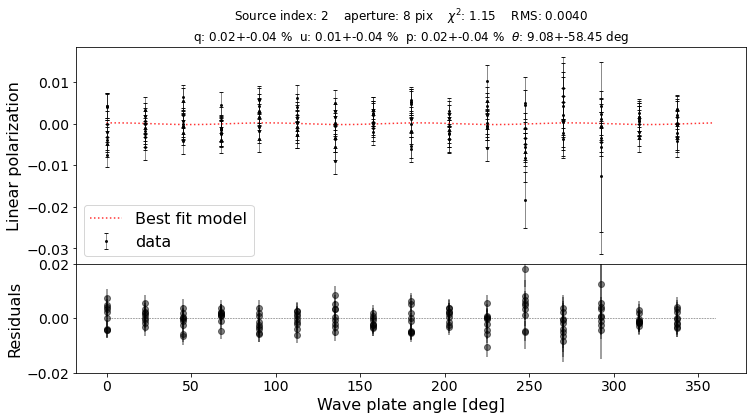

Source index: i=3 
Source RA=100.5258822609234 Dec=-23.72475553154286 mag=<QFloat -10.149+-0.001 >
Best aperture radius: 8 pixels
Polarization in Q: <QFloat 0.0923+-0.0005 >
Polarization in U: <QFloat -0.0439+-0.0005 >
Total linear polarization p: <QFloat 0.1022+-0.0005 >
Angle of polarization theta: <QFloat 167.3+-0.1 >
Free constant k: <QFloat 0.9847281367963187+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.00474
Reduced chi-square (n=144, DOF=140): 1.38


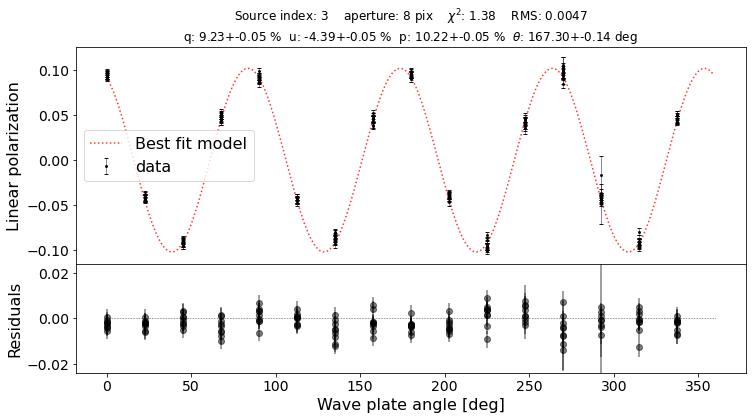

Source index: i=4 
Source RA=100.5258822609234 Dec=-23.72475553154286 mag=<QFloat -10.276+-0.001 >
Best aperture radius: 7 pixels
Polarization in Q: <QFloat -0.1100+-0.0006 >
Polarization in U: <QFloat -0.0526+-0.0006 >
Total linear polarization p: <QFloat 0.1220+-0.0006 >
Angle of polarization theta: <QFloat 102.8+-0.1 >
Free constant k: <QFloat 1.0420951147352784+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.00581
Reduced chi-square (n=144, DOF=140): 0.94


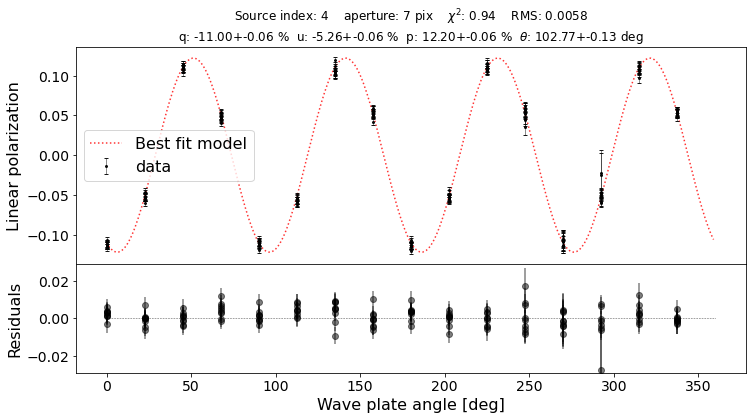

Source index: i=5 
Source RA=100.5258822609234 Dec=-23.72475553154286 mag=<QFloat -10.361+-0.001 >
Best aperture radius: 9 pixels
Polarization in Q: <QFloat -0.020+-0.001 >
Polarization in U: <QFloat -0.015+-0.001 >
Total linear polarization p: <QFloat 0.025+-0.001 >
Angle of polarization theta: <QFloat 108+-1 >
Free constant k: <QFloat 1.0138676112685163+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.01482
Reduced chi-square (n=144, DOF=140): 0.83


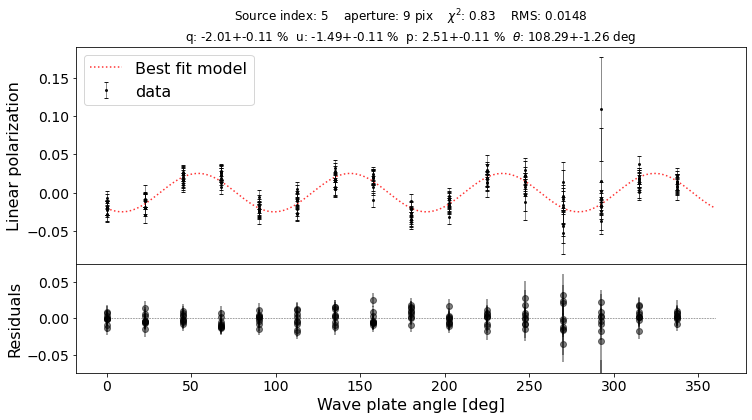

Source index: i=6 
Source RA=100.5258822609234 Dec=-23.72475553154286 mag=<QFloat -10.425+-0.001 >
Best aperture radius: 8 pixels
Polarization in Q: <QFloat -0.011+-0.001 >
Polarization in U: <QFloat -0.031+-0.001 >
Total linear polarization p: <QFloat 0.033+-0.001 >
Angle of polarization theta: <QFloat 125+-1 >
Free constant k: <QFloat 1.0398988123405442+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.01553
Reduced chi-square (n=144, DOF=140): 0.87


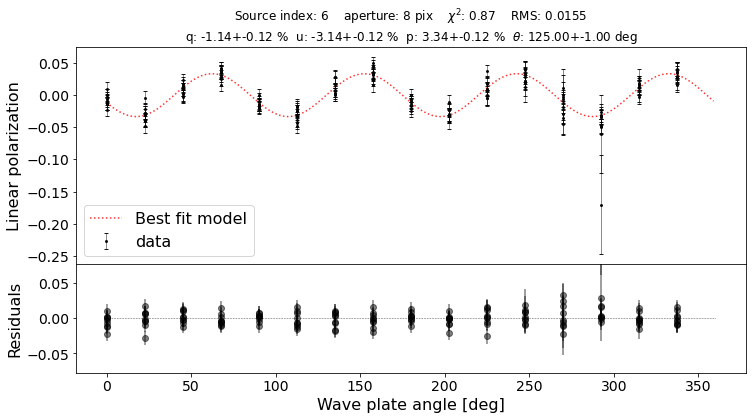

Source index: i=7 
Source RA=100.5258822609234 Dec=-23.72475553154286 mag=<QFloat -10.476+-0.001 >
Best aperture radius: 6 pixels
Polarization in Q: <QFloat 0.002+-0.002 >
Polarization in U: <QFloat -0.031+-0.002 >
Total linear polarization p: <QFloat 0.031+-0.002 >
Angle of polarization theta: <QFloat 137+-1 >
Free constant k: <QFloat 1.0230008239234945+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.02031
Reduced chi-square (n=144, DOF=140): 0.88


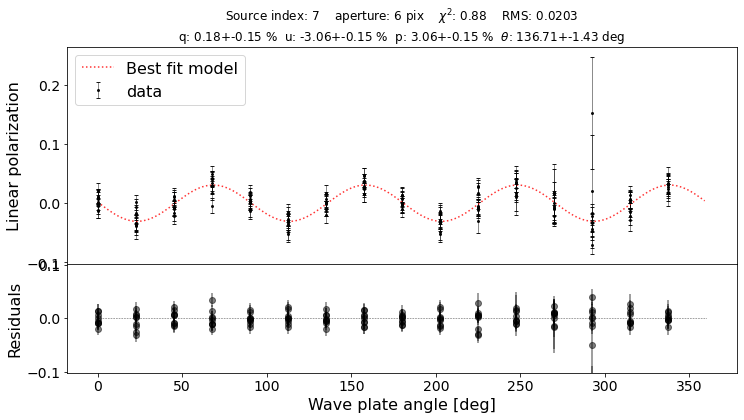

Source index: i=8 
Source RA=100.5149177934232 Dec=-23.70788172270136 mag=<QFloat -10.475+-0.002 >
Best aperture radius: 5 pixels
Polarization in Q: <QFloat -0.041+-0.001 >
Polarization in U: <QFloat -0.065+-0.001 >
Total linear polarization p: <QFloat 0.077+-0.001 >
Angle of polarization theta: <QFloat 119.0+-0.5 >
Free constant k: <QFloat 0.9285341541899381+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.01743
Reduced chi-square (n=144, DOF=140): 0.80


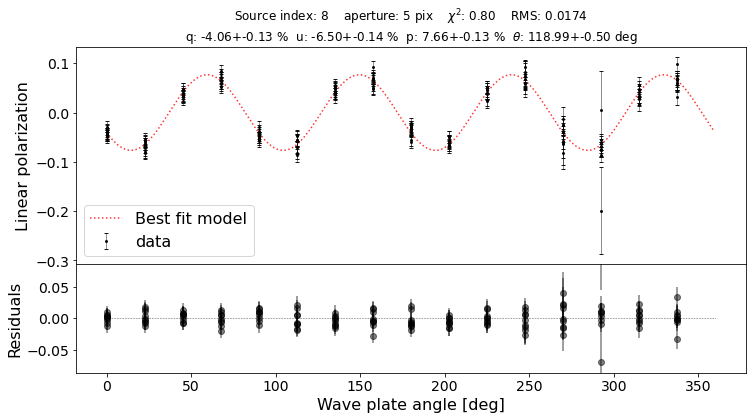

Source index: i=9 
Source RA=100.5149177934232 Dec=-23.70788172270136 mag=<QFloat -10.531+-0.002 >
Best aperture radius: 7 pixels
Polarization in Q: <QFloat -0.089+-0.001 >
Polarization in U: <QFloat -0.079+-0.001 >
Total linear polarization p: <QFloat 0.119+-0.001 >
Angle of polarization theta: <QFloat 110.8+-0.3 >
Free constant k: <QFloat 1.0198101066132905+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.01371
Reduced chi-square (n=144, DOF=140): 0.70


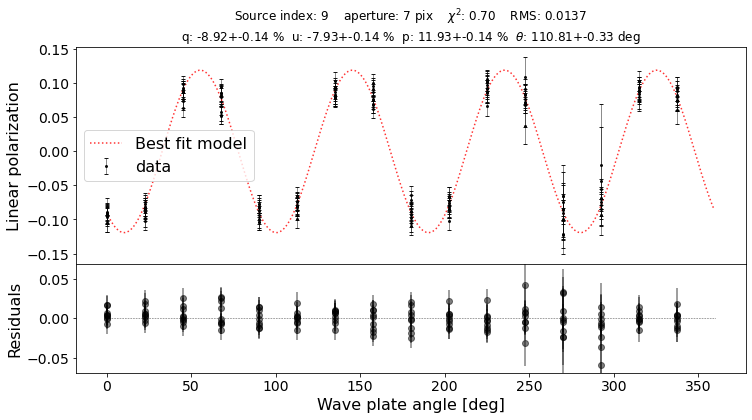

Source index: i=10 
Source RA=100.4835021814403 Dec=-23.72054894575743 mag=<QFloat -10.881+-0.001 >
Best aperture radius: 11 pixels
Polarization in Q: <QFloat -0.037+-0.002 >
Polarization in U: <QFloat -0.062+-0.002 >
Total linear polarization p: <QFloat 0.072+-0.002 >
Angle of polarization theta: <QFloat 119.8+-0.8 >
Free constant k: <QFloat 0.8339351699554969+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.02428
Reduced chi-square (n=144, DOF=140): 1.02


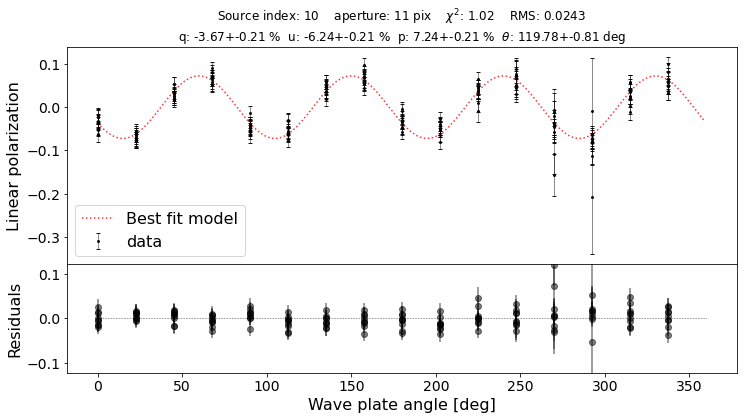

Source index: i=11 
Source RA=100.4835021814403 Dec=-23.72054894575743 mag=<QFloat -10.902+-0.001 >
Best aperture radius: 9 pixels
Polarization in Q: <QFloat -0.086+-0.002 >
Polarization in U: <QFloat -0.080+-0.002 >
Total linear polarization p: <QFloat 0.118+-0.002 >
Angle of polarization theta: <QFloat 111.5+-0.4 >
Free constant k: <QFloat 1.0259433935743776+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.01714
Reduced chi-square (n=144, DOF=140): 0.74


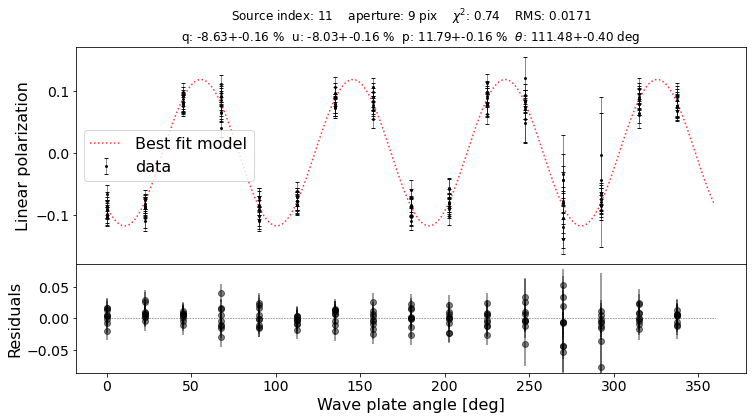

Source index: i=12 
Source RA=100.4835021814403 Dec=-23.72054894575743 mag=<QFloat -10.922+-0.001 >
Best aperture radius: 5 pixels
Polarization in Q: <QFloat -0.004+-0.001 >
Polarization in U: <QFloat 0.001+-0.001 >
Total linear polarization p: <QFloat 0.004+-0.001 >
Angle of polarization theta: <QFloat 80+-10 >
Free constant k: <QFloat 1.0083940088530046+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.01414
Reduced chi-square (n=144, DOF=140): 0.94


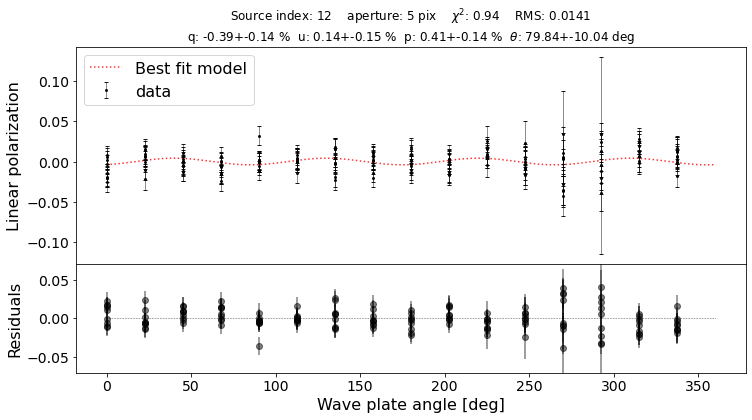

Source index: i=13 
Source RA=100.4835021814403 Dec=-23.72054894575743 mag=<QFloat -10.942+-0.001 >
Best aperture radius: 5 pixels
Polarization in Q: <QFloat -0.024+-0.002 >
Polarization in U: <QFloat -0.045+-0.002 >
Total linear polarization p: <QFloat 0.051+-0.002 >
Angle of polarization theta: <QFloat 121+-1 >
Free constant k: <QFloat 1.0506364620642268+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.01648
Reduced chi-square (n=144, DOF=140): 1.00


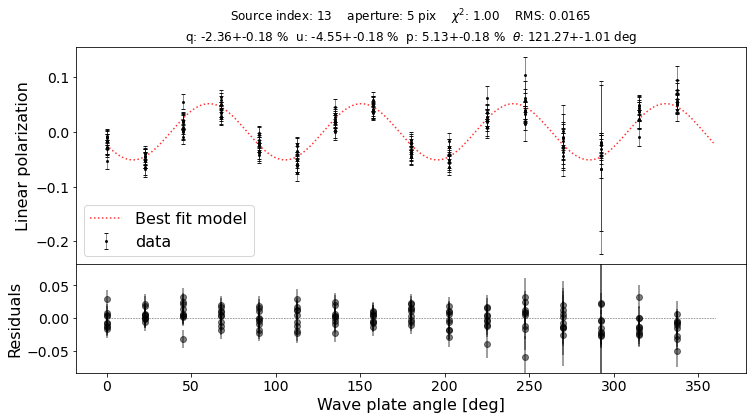

Source index: i=14 
Source RA=100.4835021814403 Dec=-23.72054894575743 mag=<QFloat -10.960+-0.002 >
Best aperture radius: 7 pixels
Polarization in Q: <QFloat -0.025+-0.002 >
Polarization in U: <QFloat -0.043+-0.002 >
Total linear polarization p: <QFloat 0.050+-0.002 >
Angle of polarization theta: <QFloat 120+-1 >
Free constant k: <QFloat 1.0684627346004594+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.02476
Reduced chi-square (n=144, DOF=140): 0.96


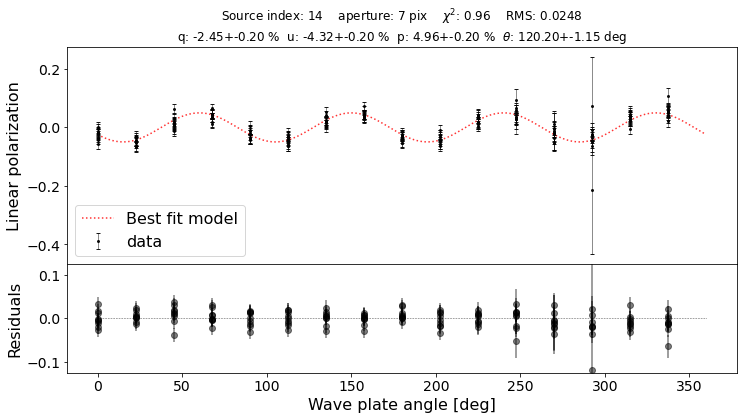

Source index: i=15 
Source RA=100.5334098118942 Dec=-23.70447217493712 mag=<QFloat -10.605+-0.002 >
Best aperture radius: 6 pixels
Polarization in Q: <QFloat -0.005+-0.002 >
Polarization in U: <QFloat -0.000+-0.002 >
Total linear polarization p: <QFloat 0.005+-0.002 >
Angle of polarization theta: <QFloat 90+-10 >
Free constant k: <QFloat 1.0290771776516714+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.02274
Reduced chi-square (n=144, DOF=140): 0.74


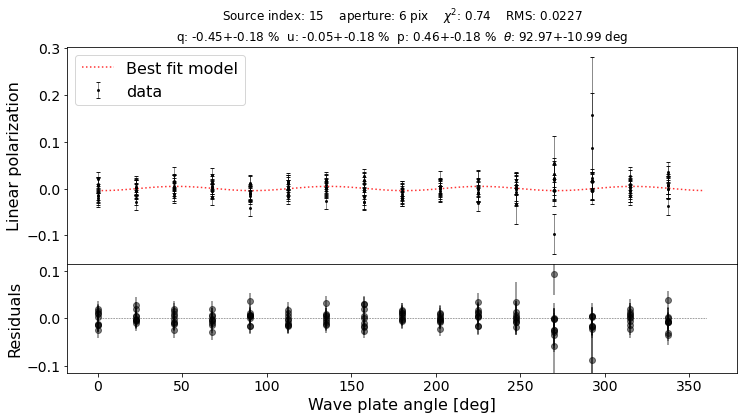

Source index: i=16 
Source RA=100.4834951280312 Dec=-23.7323667936218 mag=<QFloat -10.940+-0.002 >
Best aperture radius: 7 pixels
Polarization in Q: <QFloat -0.086+-0.002 >
Polarization in U: <QFloat -0.025+-0.002 >
Total linear polarization p: <QFloat 0.090+-0.002 >
Angle of polarization theta: <QFloat 98.2+-0.6 >
Free constant k: <QFloat 0.8363430330595318+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.01779
Reduced chi-square (n=144, DOF=140): 0.64


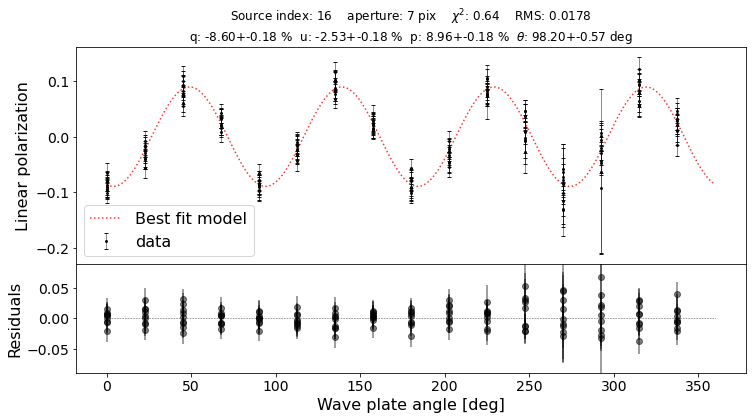

Source index: i=17 
Source RA=100.4834951280312 Dec=-23.7323667936218 mag=<QFloat -10.945+-0.002 >
Best aperture radius: 8 pixels
Polarization in Q: <QFloat -0.087+-0.002 >
Polarization in U: <QFloat -0.024+-0.002 >
Total linear polarization p: <QFloat 0.090+-0.002 >
Angle of polarization theta: <QFloat 97.7+-0.6 >
Free constant k: <QFloat 0.8035753267111412+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.02033
Reduced chi-square (n=144, DOF=140): 0.66


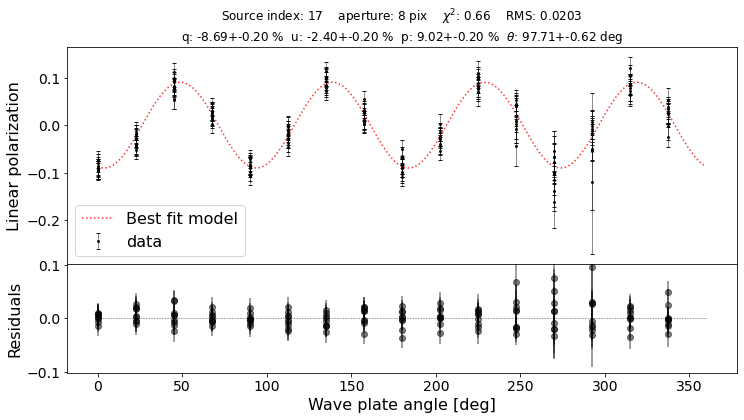

Source index: i=18 
Source RA=100.5349731476632 Dec=-23.70386539111642 mag=<QFloat nan+-nan >
Best aperture radius: 5 pixels
Polarization in Q: <QFloat 0.004+-0.002 >
Polarization in U: <QFloat 0.004+-0.002 >
Total linear polarization p: <QFloat 0.005+-0.002 >
Angle of polarization theta: <QFloat 20+-10 >
Free constant k: <QFloat 0.9867090996066258+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.02220
Reduced chi-square (n=144, DOF=140): 0.62


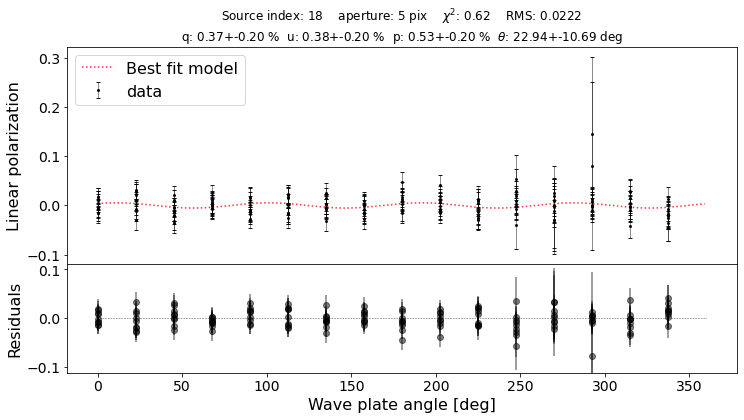

Source index: i=19 
Source RA=100.5349731476632 Dec=-23.70386539111642 mag=<QFloat nan+-nan >
Best aperture radius: 7 pixels
Polarization in Q: <QFloat 0.006+-0.002 >
Polarization in U: <QFloat 0.003+-0.002 >
Total linear polarization p: <QFloat 0.006+-0.002 >
Angle of polarization theta: <QFloat 13+-10 >
Free constant k: <QFloat 0.9902177103525616+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.02560
Reduced chi-square (n=144, DOF=140): 0.61


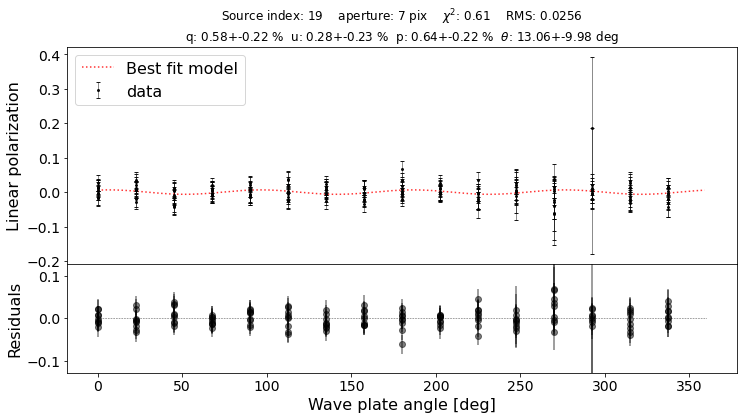

Source index: i=20 
Source RA=100.5349731476632 Dec=-23.70386539111642 mag=<QFloat nan+-nan >
Best aperture radius: 8 pixels
Polarization in Q: <QFloat 0.006+-0.003 >
Polarization in U: <QFloat 0.001+-0.003 >
Total linear polarization p: <QFloat 0.007+-0.003 >
Angle of polarization theta: <QFloat 10+-10 >
Free constant k: <QFloat 0.9924514629933674+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.02705
Reduced chi-square (n=144, DOF=140): 0.68


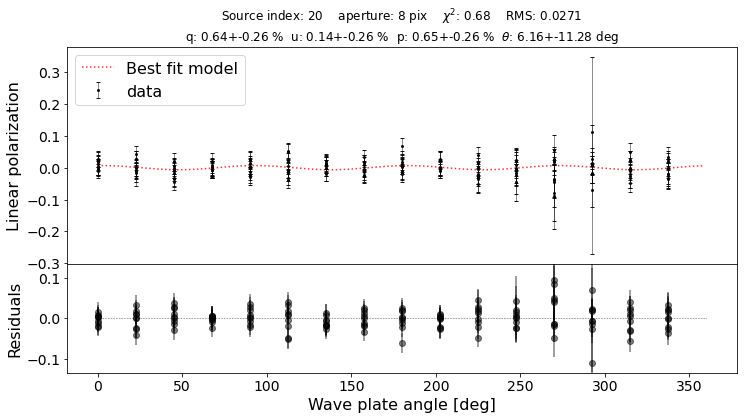

Source index: i=21 
Source RA=100.5349731476632 Dec=-23.70386539111642 mag=<QFloat nan+-nan >
Best aperture radius: 9 pixels
Polarization in Q: <QFloat 0.007+-0.003 >
Polarization in U: <QFloat 0.002+-0.003 >
Total linear polarization p: <QFloat 0.007+-0.003 >
Angle of polarization theta: <QFloat 10+-10 >
Free constant k: <QFloat 0.9930637384089446+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.03461
Reduced chi-square (n=144, DOF=140): 0.74


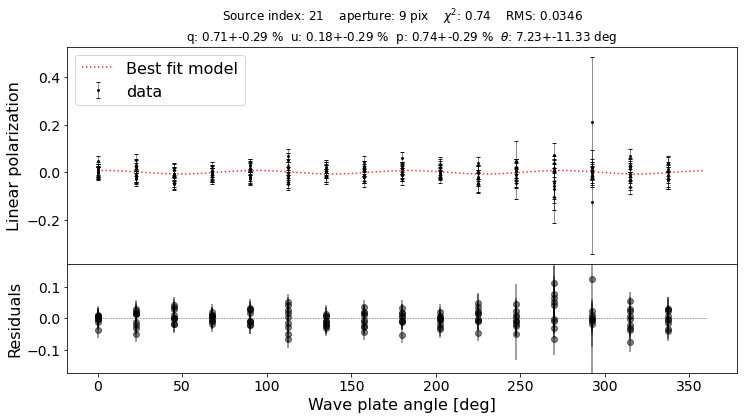

Source index: i=22 
Source RA=100.5349731476632 Dec=-23.70386539111642 mag=<QFloat nan+-nan >
Best aperture radius: 10 pixels
Polarization in Q: <QFloat 0.008+-0.003 >
Polarization in U: <QFloat 0.001+-0.003 >
Total linear polarization p: <QFloat 0.008+-0.003 >
Angle of polarization theta: <QFloat 0+-10 >
Free constant k: <QFloat 0.9931429955641032+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.05655
Reduced chi-square (n=144, DOF=140): 0.77


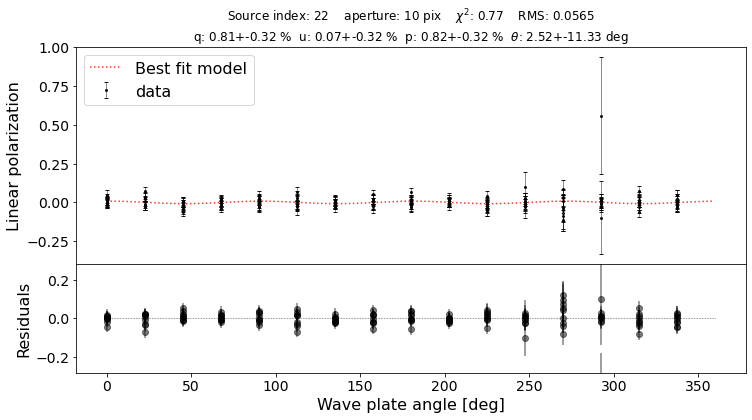

Source index: i=23 
Source RA=100.5349731476632 Dec=-23.70386539111642 mag=<QFloat nan+-nan >
Best aperture radius: 7 pixels
Polarization in Q: <QFloat -0.033+-0.004 >
Polarization in U: <QFloat -0.041+-0.004 >
Total linear polarization p: <QFloat 0.052+-0.004 >
Angle of polarization theta: <QFloat 116+-2 >
Free constant k: <QFloat 0.8621509591138303+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.03957
Reduced chi-square (n=144, DOF=140): 0.78


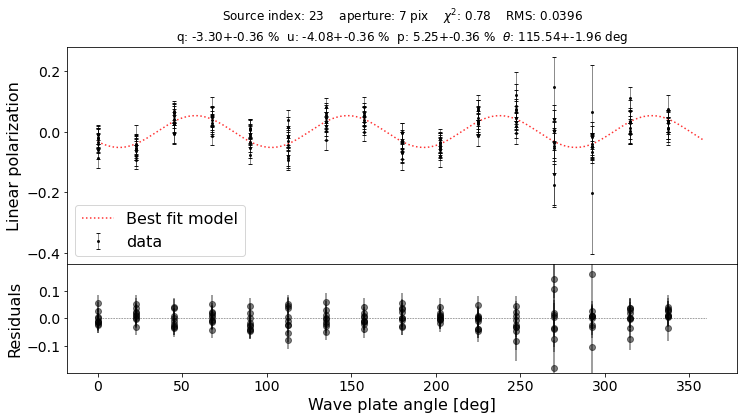

Source index: i=24 
Source RA=100.5349731476632 Dec=-23.70386539111642 mag=<QFloat nan+-nan >
Best aperture radius: 5 pixels
Polarization in Q: <QFloat -0.106+-0.004 >
Polarization in U: <QFloat -0.064+-0.004 >
Total linear polarization p: <QFloat 0.124+-0.004 >
Angle of polarization theta: <QFloat 106+-1 >
Free constant k: <QFloat 0.9612147174310026+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.04726
Reduced chi-square (n=144, DOF=140): 0.90


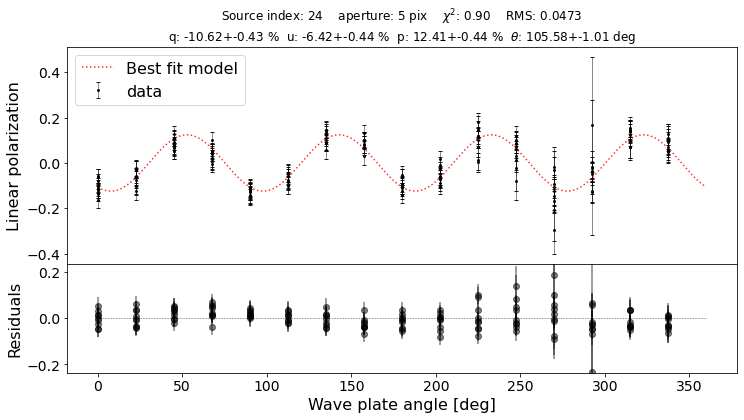

Source index: i=25 
Source RA=100.5197323039999 Dec=-23.73973032639302 mag=<QFloat -11.809+-0.001 >
Best aperture radius: 5 pixels
Polarization in Q: <QFloat -0.115+-0.004 >
Polarization in U: <QFloat -0.073+-0.004 >
Total linear polarization p: <QFloat 0.136+-0.004 >
Angle of polarization theta: <QFloat 106.3+-0.8 >
Free constant k: <QFloat 1.0479281556286988+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.03553
Reduced chi-square (n=144, DOF=140): 0.79


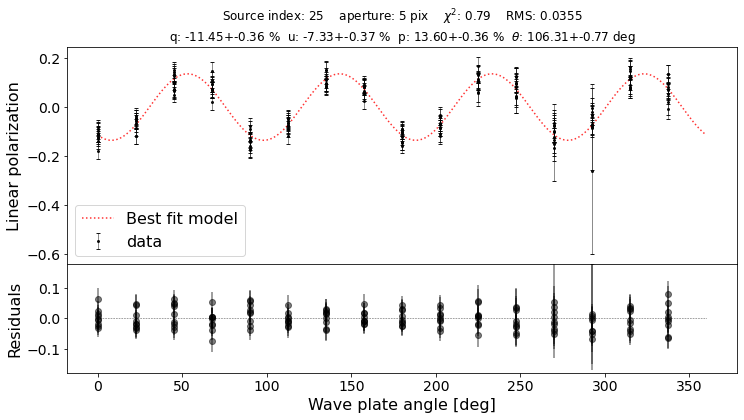

Source index: i=26 
Source RA=100.5197323039999 Dec=-23.73973032639302 mag=<QFloat -11.815+-0.001 >
Best aperture radius: 5 pixels
Polarization in Q: <QFloat 0.008+-0.005 >
Polarization in U: <QFloat -0.055+-0.005 >
Total linear polarization p: <QFloat 0.056+-0.005 >
Angle of polarization theta: <QFloat 139+-3 >
Free constant k: <QFloat 1.0020018925416327+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.05548
Reduced chi-square (n=144, DOF=140): 0.77


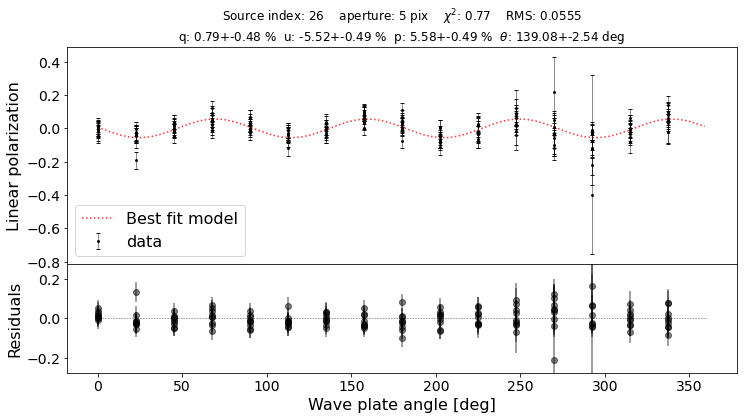

Source index: i=27 
Source RA=100.5197323039999 Dec=-23.73973032639302 mag=<QFloat -11.822+-0.001 >
Best aperture radius: 5 pixels
Polarization in Q: <QFloat 0.015+-0.005 >
Polarization in U: <QFloat -0.039+-0.005 >
Total linear polarization p: <QFloat 0.042+-0.005 >
Angle of polarization theta: <QFloat 145+-4 >
Free constant k: <QFloat 1.324561441803444+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.05339
Reduced chi-square (n=144, DOF=140): 0.79


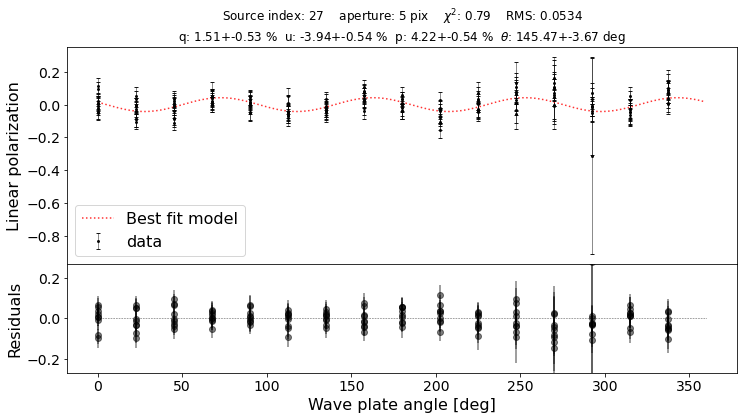

Source index: i=28 
Source RA=100.5197323039999 Dec=-23.73973032639302 mag=<QFloat -11.830+-0.001 >
Best aperture radius: 6 pixels
Polarization in Q: <QFloat -0.107+-0.004 >
Polarization in U: <QFloat -0.063+-0.004 >
Total linear polarization p: <QFloat 0.124+-0.004 >
Angle of polarization theta: <QFloat 105.3+-0.9 >
Free constant k: <QFloat 1.0657964277207859+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.03731
Reduced chi-square (n=144, DOF=140): 0.81


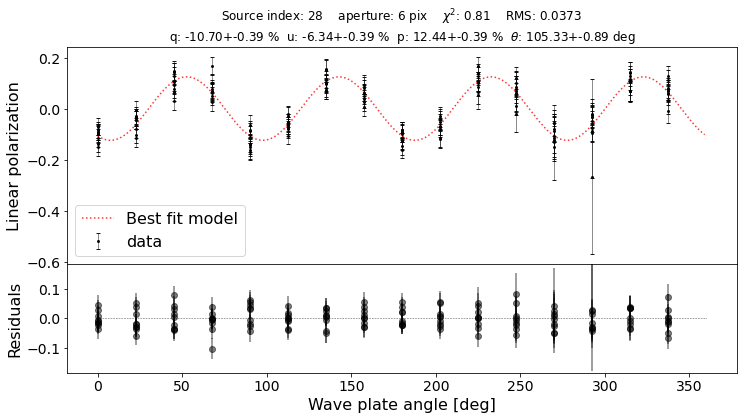

Source index: i=29 
Source RA=100.5197323039999 Dec=-23.73973032639302 mag=<QFloat -11.839+-0.001 >
Best aperture radius: 5 pixels
Polarization in Q: <QFloat -0.134+-0.004 >
Polarization in U: <QFloat -0.055+-0.005 >
Total linear polarization p: <QFloat 0.145+-0.004 >
Angle of polarization theta: <QFloat 101.2+-0.9 >
Free constant k: <QFloat 0.8450091323631274+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.04486
Reduced chi-square (n=144, DOF=140): 0.66


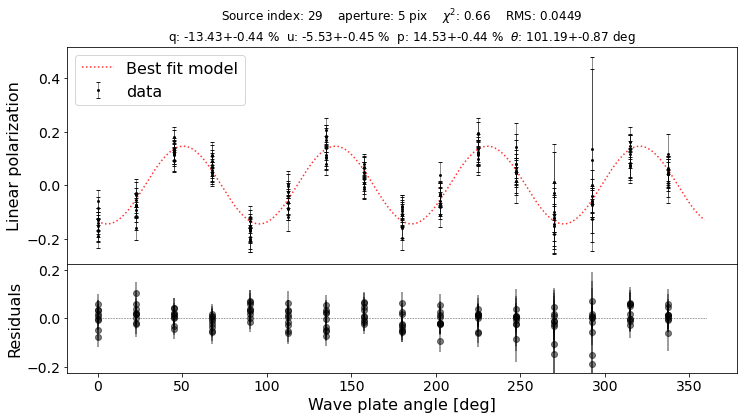

Source index: i=30 
Source RA=100.5197323039999 Dec=-23.73973032639302 mag=<QFloat -11.848+-0.001 >
Best aperture radius: 11 pixels
Polarization in Q: <QFloat -0.07+-0.03 >
Polarization in U: <QFloat -0.05+-0.03 >
Total linear polarization p: <QFloat 0.08+-0.03 >
Angle of polarization theta: <QFloat 110+-10 >
Free constant k: <QFloat 2.531818503211854+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.18708
Reduced chi-square (n=61, DOF=57): 1.91


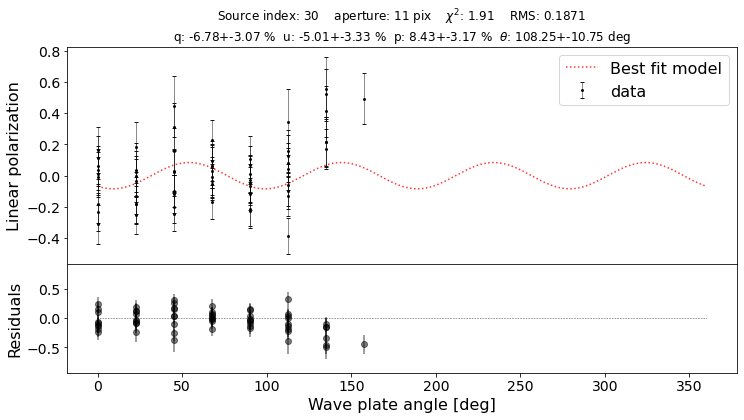

Source index: i=31 
Source RA=100.5197323039999 Dec=-23.73973032639302 mag=<QFloat -11.861+-0.001 >
Best aperture radius: 6 pixels
Polarization in Q: <QFloat -0.122+-0.006 >
Polarization in U: <QFloat 0.013+-0.006 >
Total linear polarization p: <QFloat 0.123+-0.006 >
Angle of polarization theta: <QFloat 87+-2 >
Free constant k: <QFloat 0.9005668012503256+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.05767
Reduced chi-square (n=142, DOF=138): 0.89


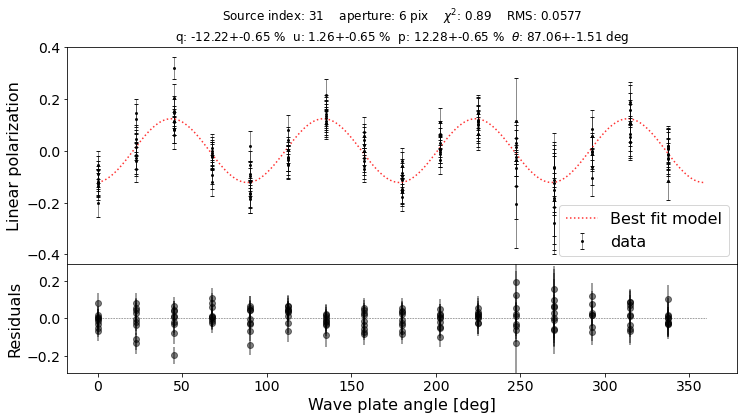

Source index: i=32 
Source RA=100.5308402526555 Dec=-23.70505460021965 mag=<QFloat -12.5968+-0.0007 >
Best aperture radius: 5 pixels
Polarization in Q: <QFloat -0.023+-0.007 >
Polarization in U: <QFloat -0.071+-0.007 >
Total linear polarization p: <QFloat 0.074+-0.007 >
Angle of polarization theta: <QFloat 126+-3 >
Free constant k: <QFloat 1.0413854853100342+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.06999
Reduced chi-square (n=143, DOF=139): 0.72


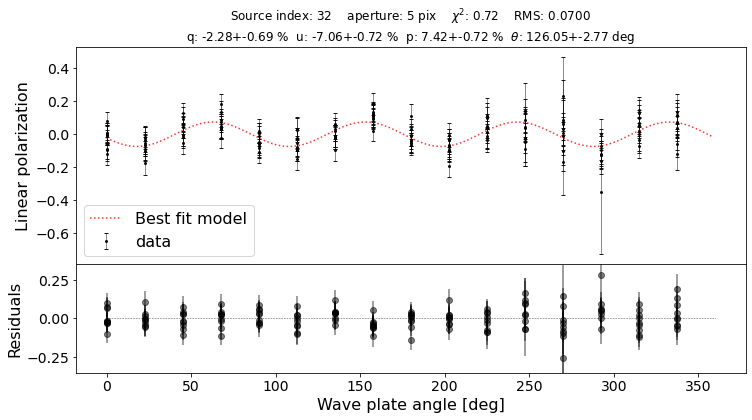

Source index: i=33 
Source RA=100.5308402526555 Dec=-23.70505460021965 mag=<QFloat -12.6195+-0.0007 >
Best aperture radius: 5 pixels
Polarization in Q: <QFloat -0.064+-0.008 >
Polarization in U: <QFloat -0.012+-0.008 >
Total linear polarization p: <QFloat 0.065+-0.008 >
Angle of polarization theta: <QFloat 95+-4 >
Free constant k: <QFloat 0.9570949627979327+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.07784
Reduced chi-square (n=143, DOF=139): 0.54


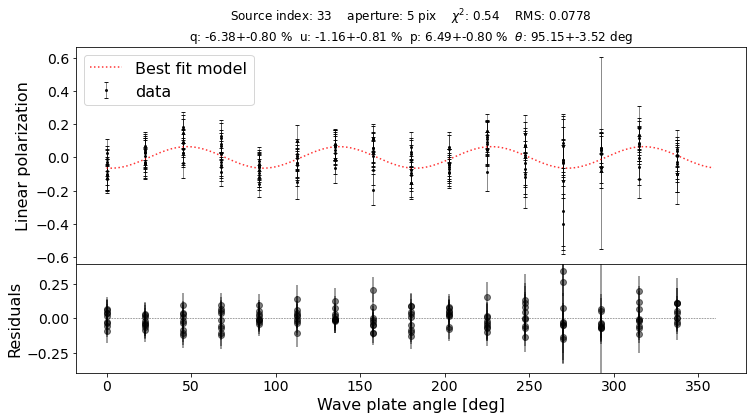

Source index: i=34 
Source RA=100.5308402526555 Dec=-23.70505460021965 mag=<QFloat -12.6532+-0.0007 >
Best aperture radius: 5 pixels
Polarization in Q: <QFloat -0.18+-0.01 >
Polarization in U: <QFloat -0.09+-0.01 >
Total linear polarization p: <QFloat 0.20+-0.01 >
Angle of polarization theta: <QFloat 103+-2 >
Free constant k: <QFloat 1.0529402288443968+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.11881
Reduced chi-square (n=141, DOF=137): 1.14


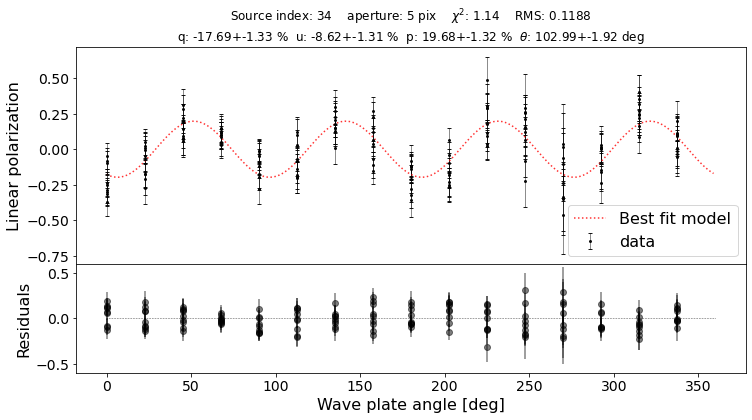

Source index: i=35 
Source RA=100.5353667409506 Dec=-23.71050389313188 mag=<QFloat nan+-nan >
Best aperture radius: 10 pixels
Polarization in Q: <QFloat -0.12+-0.05 >
Polarization in U: <QFloat -0.15+-0.05 >
Total linear polarization p: <QFloat 0.19+-0.05 >
Angle of polarization theta: <QFloat 115+-8 >
Free constant k: <QFloat 0.8348678352763294+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.21961
Reduced chi-square (n=41, DOF=37): 0.43


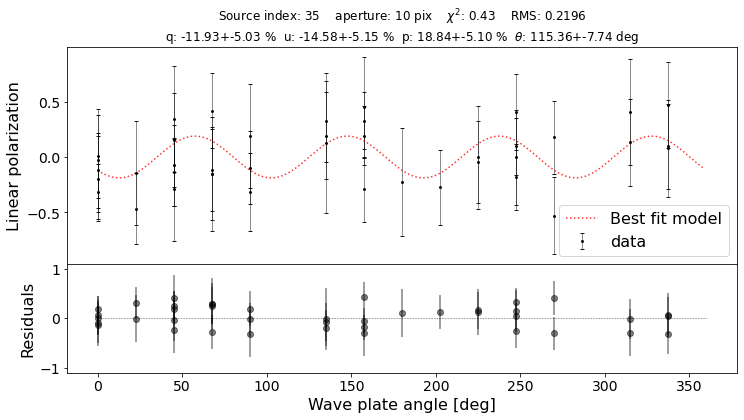

In [8]:
# Set minimum and maximum allowed apertures
min_aperture, max_aperture = 4, 12 

# get polarimetry results for all sources available and display results
for source_index in range(fits.getheader(polarl2product)["NSOURCES"]) :
    s4pipelib.get_polarimetry_results(polarl2product, 
                                      source_index=source_index, 
                                      aperture_index=None, 
                                      min_aperture=min_aperture, 
                                      max_aperture=max_aperture, plot=True, verbose=True)

### Get polarimetry for a given source and aperture radius

Source index: i=0 
Source RA=100.5258822609234 Dec=-23.72475553154286 mag=<QFloat -8.929+-0.002 >
Best aperture radius: 10 pixels
Polarization in Q: <QFloat -0.0327+-0.0001 >
Polarization in U: <QFloat -0.0895+-0.0001 >
Total linear polarization p: <QFloat 0.0953+-0.0001 >
Angle of polarization theta: <QFloat 124.97+-0.03 >
Free constant k: <QFloat 1.0157936197823516+-nan >
Zero of polarization: <QFloat 0.0+-nan >
RMS of zi residuals: 0.00093
Reduced chi-square (n=144, DOF=140): 2.49


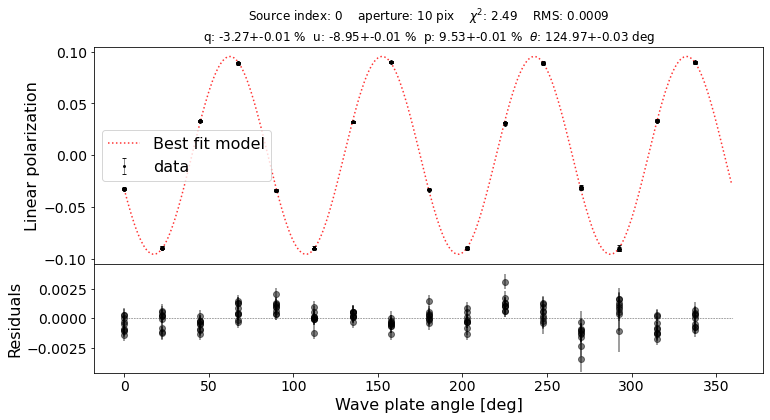

In [9]:
# example on how to get results for a custom choice of source and aperture
pol_results = s4pipelib.get_polarimetry_results(polarl2product, 
                                                source_index=0, 
                                                aperture_index=8, 
                                                plot=True, verbose=True)

In [11]:
# print polarimetry results for the object above
pol_results

{'POLAR_PRODUCT': '/Volumes/Samsung_T5/Data/SPARC4/comissioning_nov22/reduced/sparc4acs3/20221115/20221115_s4c3_ngc_l2_01_000230_l2_polar.fits',
 'SOURCE_INDEX': 0,
 'APERTURE_INDEX': 8,
 'APERTURE_RADIUS': 10,
 'NEXPS': 144,
 'WAVEPLATE_ANGLES': array([  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         22.5,  22.5,  22.5,  22.5,  22.5,  22.5,  22.5,  22.5,  22.5,
         45. ,  45. ,  45. ,  45. ,  45. ,  45. ,  45. ,  45. ,  45. ,
         67.5,  67.5,  67.5,  67.5,  67.5,  67.5,  67.5,  67.5,  67.5,
         90. ,  90. ,  90. ,  90. ,  90. ,  90. ,  90. ,  90. ,  90. ,
        112.5, 112.5, 112.5, 112.5, 112.5, 112.5, 112.5, 112.5, 112.5,
        135. , 135. , 135. , 135. , 135. , 135. , 135. , 135. , 135. ,
        157.5, 157.5, 157.5, 157.5, 157.5, 157.5, 157.5, 157.5, 157.5,
        180. , 180. , 180. , 180. , 180. , 180. , 180. , 180. , 180. ,
        202.5, 202.5, 202.5, 202.5, 202.5, 202.5, 202.5, 202.5, 202.5,
        225. , 225. , 225. , 225. , 225. , 2